In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as snb
import matplotlib.pyplot as plt

In [3]:
train_bio = pd.read_csv("input_light/biology.csv",encoding='utf-8')
train_cooking = pd.read_csv("input_light/cooking.csv",encoding='utf-8')
train_crypto = pd.read_csv("input_light/crypto.csv",encoding='utf-8')
train_dyi = pd.read_csv("input_light/diy.csv",encoding='utf-8')
train_robotic = pd.read_csv("input_light/robotics.csv",encoding='utf-8')
train_travel = pd.read_csv("input_light/travel.csv",encoding='utf-8')
test_df = pd.read_csv("input_light/test.csv",encoding='utf-8')

In [4]:
# df_list = []
df_list = pd.concat([train_bio,train_cooking,train_crypto,train_dyi,train_robotic,train_travel])

## Length of dataset

In [5]:
df_list.head()

,id,title,content,tags
0,1,criticality ribosome binding site relative sta...,prokaryotic translation critical efficient tra...,ribosome binding-sites translation synthetic-b...
1,2,rnase contamination rna based experiments prev...,anyone suggestions prevent rnase contamination...,rna biochemistry
2,3,lymphocyte sizes clustered two groups,tortora writes principles anatomy physiology l...,immunology cell-biology hematology
3,4,long antibiotic dosed lb maintain good selection,various people lab prepare liter lb add kanamy...,cell-culture
4,5,exon order always preserved splicing,cases splicing machinery constructs mrna exons...,splicing mrna spliceosome introns exons


In [6]:
df_list['doc'] = df_list['title'] + ' ' + df_list['content']

In [7]:
print "Total length = %s"%df_list.shape[0]

Total length = 87000


In [8]:
print "Length of null data = %s"%df_list[df_list['doc'].isnull()].shape[0]

Length of null data = 2


In [9]:
print "Length of null data = %s"%df_list[df_list['tags'].isnull()].shape[0]

Length of null data = 0


## Number of unique tags in training datasets

In [20]:
df_list['tags'][0:10]

0    ribosome binding-sites translation synthetic-b...
1                                     rna biochemistry
2                   immunology cell-biology hematology
3                                         cell-culture
4              splicing mrna spliceosome introns exons
5                   dna biochemistry molecular-biology
6                                neuroscience synapses
7                                             plasmids
8    molecular-genetics gene-expression experimenta...
9                  evolution mitochondria chloroplasts
Name: tags, dtype: object

In [11]:
Y = [item.replace("-","_").split(" ") for item in df_list['tags']]
all_tags = list(set(sum(Y,[])))

In [21]:
length_of_tags = pd.DataFrame(zip(*np.unique([len(tag) for tag in Y],return_counts=True)),columns=['length','count'])

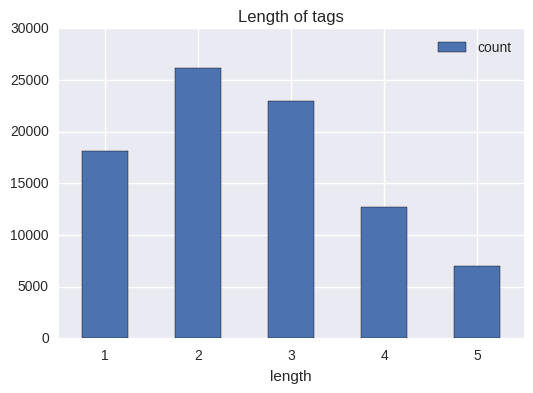

In [31]:
%matplotlib inline
# ax = plt.subplot()
# ax.plot(length_of_tags['length'],label='')
ax = length_of_tags.set_index("length").plot(kind='bar',rot=0,title="Length of tags")

In [32]:
tags = set(all_tags)

In [33]:
print len(tags)

4268


In [42]:
word_title = [item.replace("-","_").split(" ") for item in df_list['title']]
title_dict = list(set(sum(word_title,[])))

In [44]:
title_dict = set(title_dict)

In [45]:
number_of_tags_in_title = tags.intersection(title_dict)

In [53]:
print "Ratio of tags in title = %s %%"%(len(number_of_tags_in_title)*100/len(all_tags))

Ratio of tags in title = 61 %
